# American Sign Language Recognition
Our project contains 2 google colab files
- ML_CNN: We trained one CNN model and got 93.05% accuracy. Therefore, we tried to improve our project by using ensemble technique.
- ML_Ensemble: We combined 3 CNN models to improve overall accuracy. We finally got the accuracy of 96.28%

In [1]:
# import data

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [2]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
# Read files 
train = pd.read_csv('/content/drive/MyDrive/Final Project/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Final Project/sign_mnist_test.csv')

In [5]:
# Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')


In [6]:
# Define class labels 
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]


Label for the image is:  W


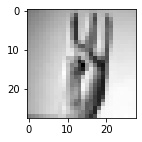

In [7]:
# Sanity check - plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

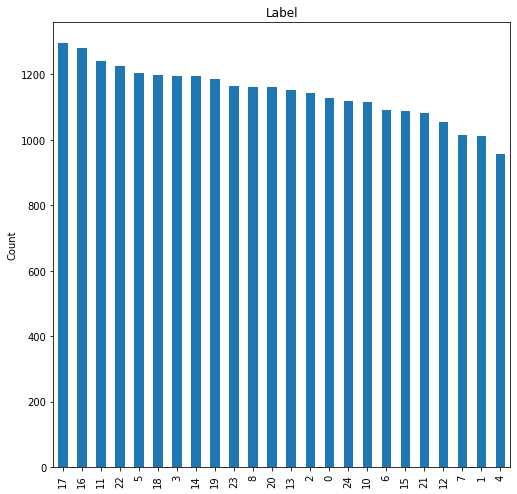

In [8]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [9]:
# Normalize 
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.


In [10]:
# Convert y to categorical 
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [11]:
# Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [12]:
# Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


In [13]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [14]:
#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 13s 8ms/step - loss: 2.4586 - acc: 0.2402 - val_loss: 1.3923 - val_acc: 0.5414
Epoch 2/10
215/215 [==============================] - 1s 7ms/step - loss: 1.1164 - acc: 0.6267 - val_loss: 0.7697 - val_acc: 0.7267
Epoch 3/10
215/215 [==============================] - 2s 7ms/step - loss: 0.6674 - acc: 0.7765 - val_loss: 0.5256 - val_acc: 0.8596
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.4460 - acc: 0.8492 - val_loss: 0.4341 - val_acc: 0.8653
Epoch 5/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3099 - acc: 0.8942 - val_loss: 0.3505 - val_acc: 0.8875
Epoch 6/10
215/215 [==============================] - 2s 7ms/step - loss: 0.2313 - acc: 0.9240 - val_loss: 0.3144 - val_acc: 0.8950
Epoch 7/10
215/215 [==============================] - 2s 7ms/step - loss: 0.1821 - acc: 0.9415 - val_loss: 0.3135 - val_acc: 0.9030
Epoch 8/10
215/215 [==============================] - 1s 7ms/step - loss: 0

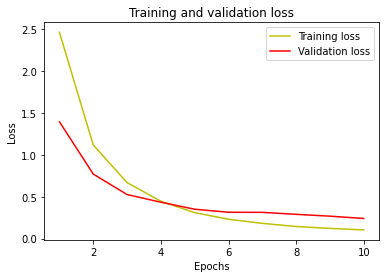

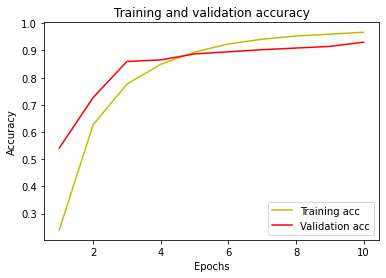

In [15]:
# Plot the training and validation accuracy and loss 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# prediction = model.predict(X_test)

prediction = np.argmax(model.predict(X_test), axis=-1)

# predictions = (model.predict(X_test) > 0.5).astype("int32")

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

# i = random.randint(1,len(predictions))
# plt.imshow(X_test[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(predictions[i])])
# print("True Label: ", class_names[int(y_test[i])])

Accuracy Score =  0.9305633017289459


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

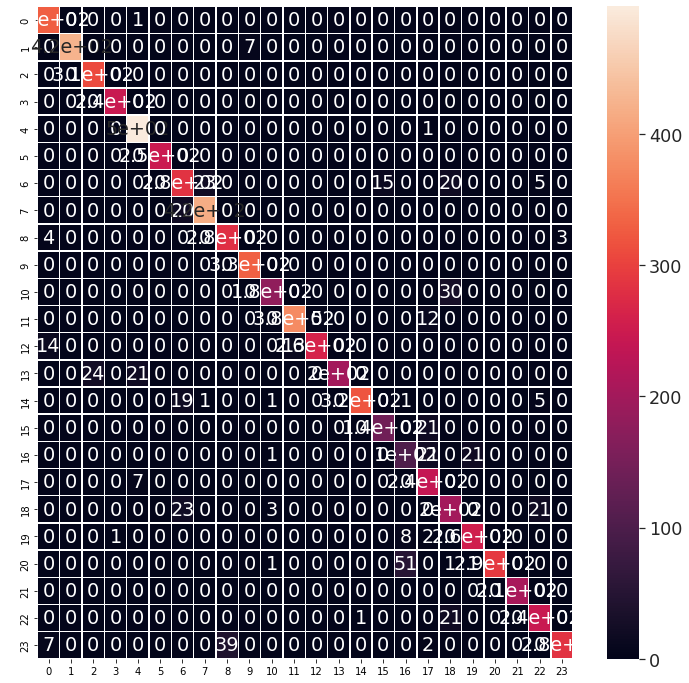

In [20]:
# Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7f849bca0350>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E'),
  Text(0, 0, 'F'),
  Text(0, 0, 'G'),
  Text(0, 0, 'H'),
  Text(0, 0, 'I'),
  Text(0, 0, 'J'),
  Text(0, 0, 'K'),
  Text(0, 0, 'L'),
  Text(0, 0, 'M'),
  Text(0, 0, 'N'),
  Text(0, 0, 'O'),
  Text(0, 0, 'P'),
  Text(0, 0, 'Q'),
  Text(0, 0, 'R'),
  Text(0, 0, 'S'),
  Text(0, 0, 'T'),
  Text(0, 0, 'U'),
  Text(0, 0, 'V'),
  Text(0, 0, 'W'),
  Text(0, 0, 'X')])

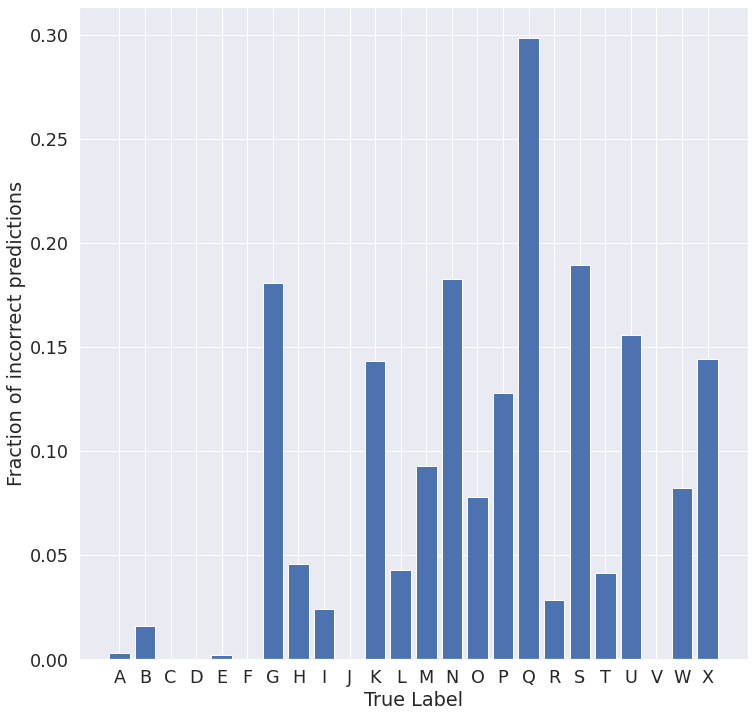

In [21]:
# Plot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 

In [22]:
import tensorflow as tf

In [23]:
# Save the model 
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets
